In [1]:
# Import Libraries:

import numpy as np
import pandas as pd
import seaborn as sn
import xgboost as xgb
import lightgbm as lgb

import matplotlib
import matplotlib.pyplot as plt
#import graphviz
import shap
import sklearn

from sklearn import ensemble
from sklearn.inspection import plot_partial_dependence
from matplotlib.colors import ListedColormap
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.pipeline import Pipeline
from skopt import BayesSearchCV
from IPython.display import Image
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, f1_score


# Susceptibility to induced seismicity 

## Geoscience BC project

In [2]:
# Classifier Names
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA", "XGBoost", "LightGBM"]


In [2]:
df_well = pd.read_csv('GeologicalDB_Montney_Seismogenic.csv')
df_grid = pd.read_csv('MontneyGrid_GeologicalDB.csv')

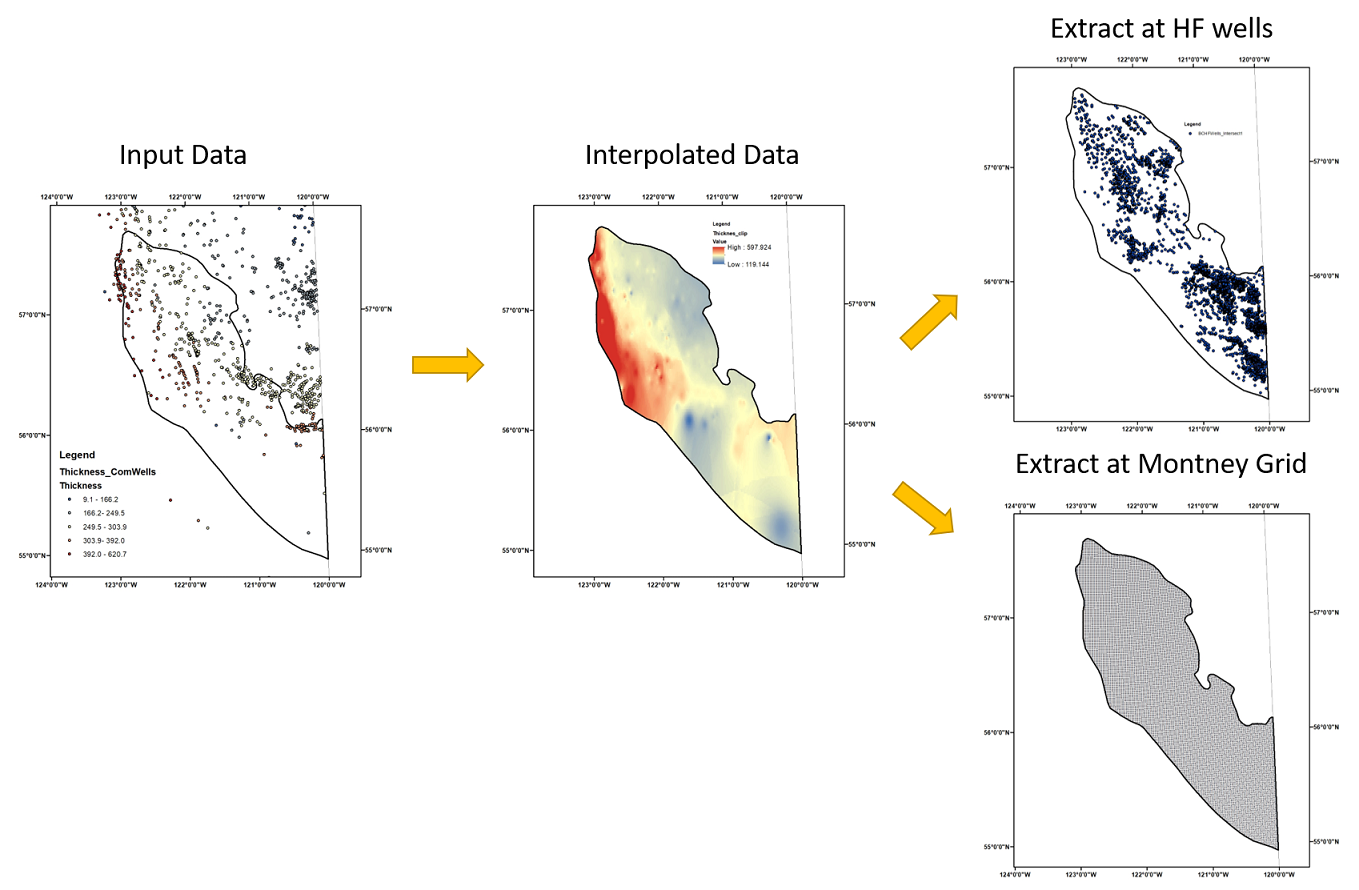

# Exploratory Data Analysis (EDA)

In [6]:
df_well.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Well_ID           4410 non-null   int64  
 1   LATITUDE          4410 non-null   float64
 2   LONGITUDE         4410 non-null   float64
 3   Bulk_Density      4410 non-null   float64
 4   BHCPv             4410 non-null   float64
 5   Gamma_Ray         4410 non-null   float64
 6   b_value           4410 non-null   float64
 7   Seismo_index      4410 non-null   float64
 8   Shear_Strain      4409 non-null   float64
 9   Shmin-Mpa         4410 non-null   float64
 10  Shmax_variation   4410 non-null   float64
 11  PP_grad           4410 non-null   float64
 12  ppgrad_std        4410 non-null   float64
 13  Montney-Top       4410 non-null   float64
 14  MiddleMontney     4410 non-null   float64
 15  Lower_Form        4410 non-null   float64
 16  Basement          4410 non-null   float64


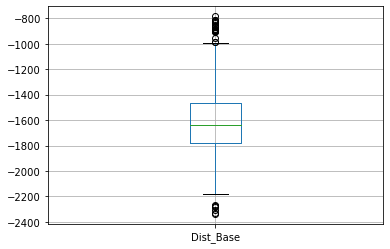

In [10]:
boxplot = df_well.boxplot(column=['Dist_Base'])

In [3]:
plot_df = df_well.drop(columns=['Well_ID', 'LATITUDE','LONGITUDE','MiddleMontney','Lower_Form','Dist_MidMon','Dist_Deb/Bell','WellDensity-5km','Shear_Strain','WellDensity-3km','Shmax_variation','Max_ISIP','Dist_CTB','Mon_Thikness','Dist_Faults','Basement','Montney-Top','Dist_Base','Dist_TopMon','WellDensity-10km','WellDensity-1km'])

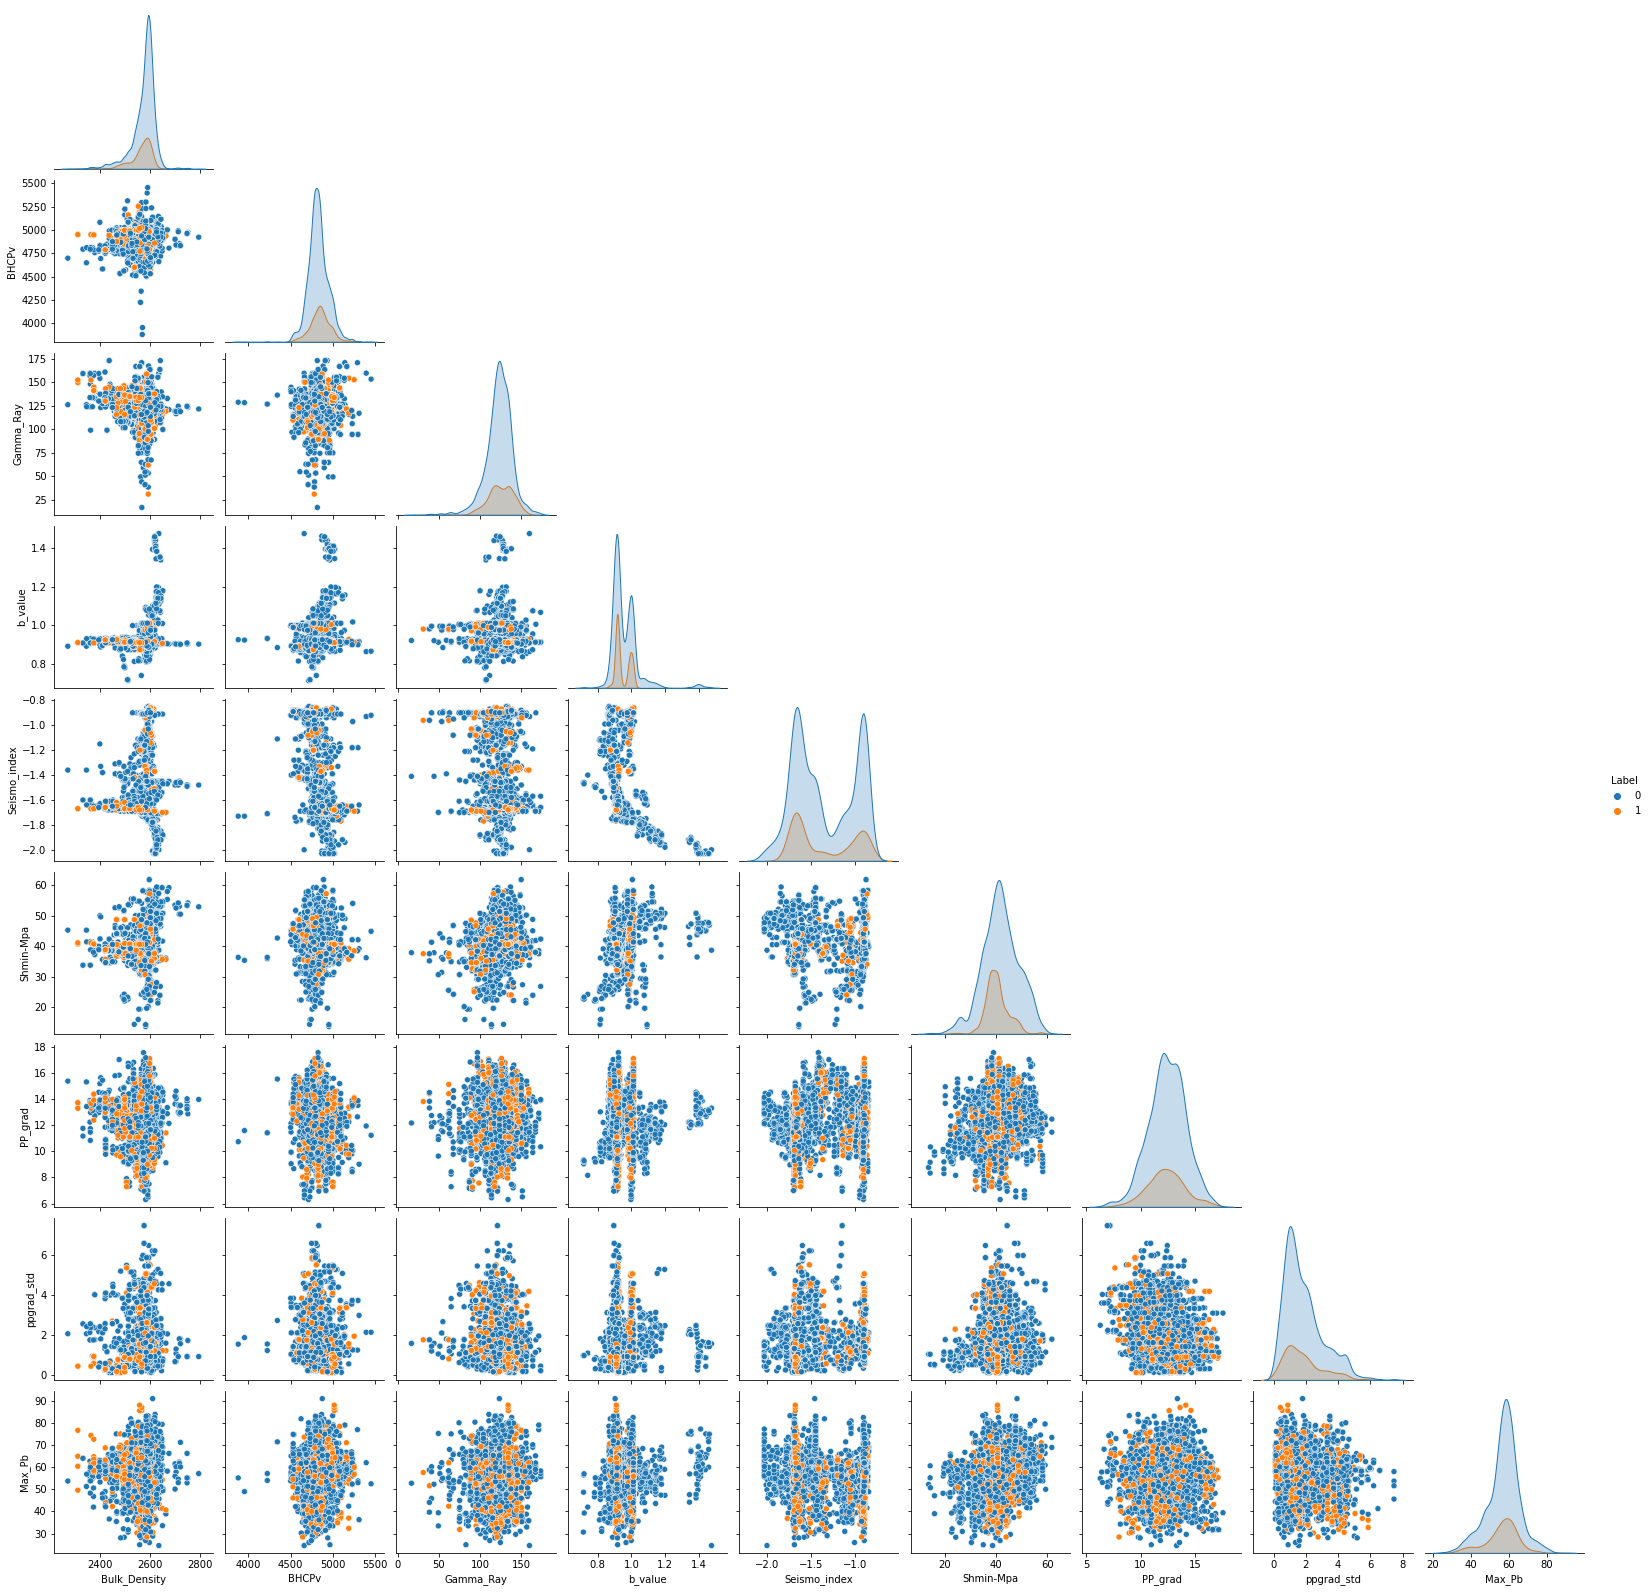

In [4]:
sns_plot = sn.pairplot(plot_df, hue="Label", corner=True)
sns_plot.savefig('pairplot_100dpi_ss.png',dpi = 100)

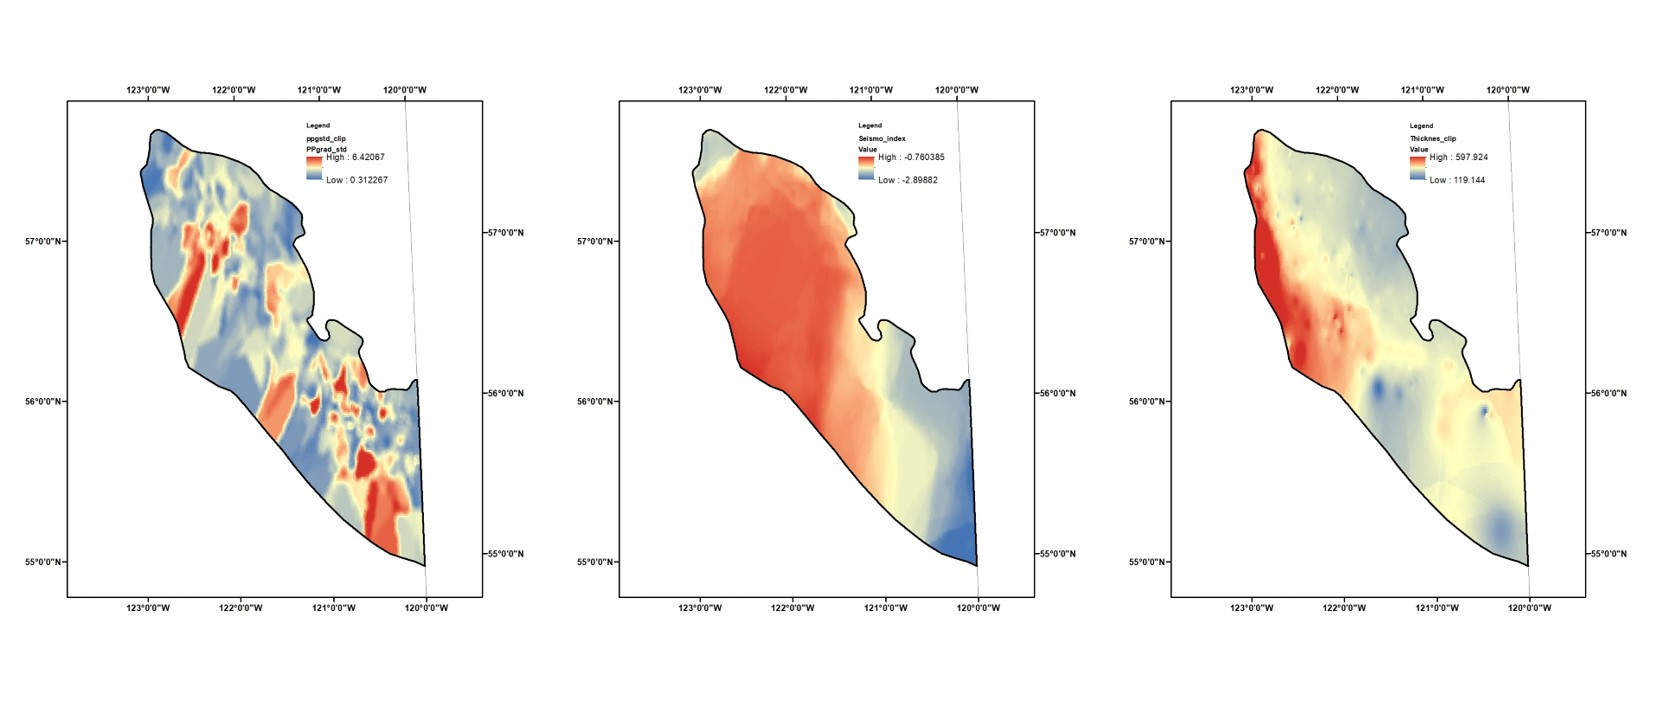

## Label count

In [3]:
df_well['Label'].value_counts(normalize=True)

0    0.802041
1    0.197959
Name: Label, dtype: float64

## Class imbalance
- 80% of data is nonseismogenic
- We'll use F1 score as performance matric (how well the model can distinguish between seismogenic and nonseismogenic wells)

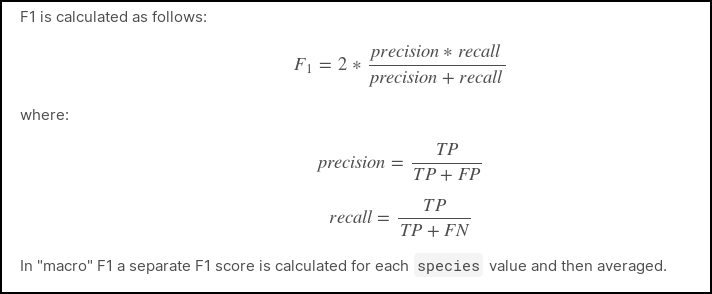

## Correlation Matrix

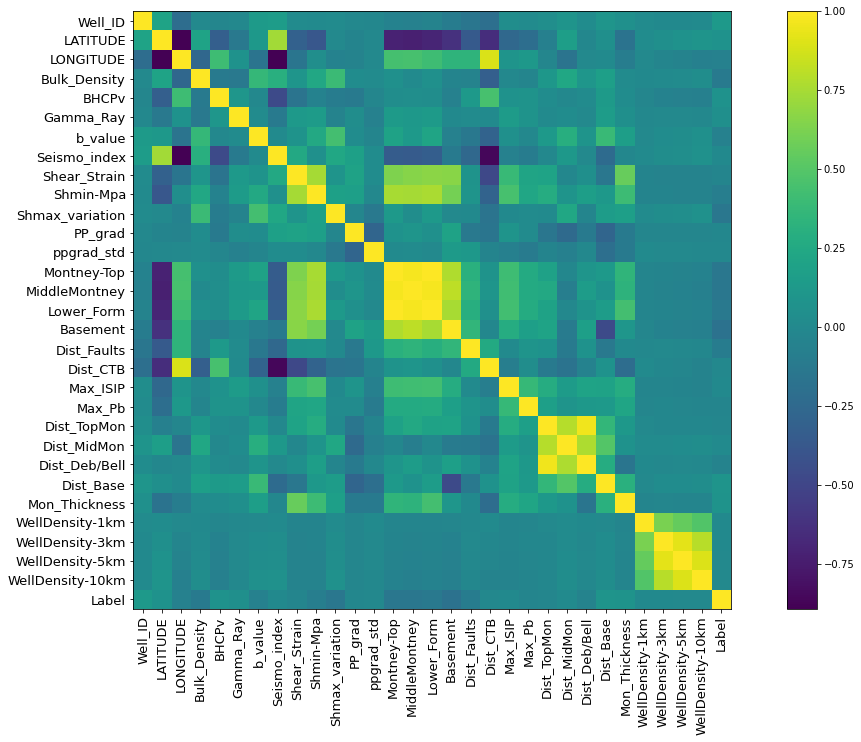

In [4]:
fig = plt.figure(figsize=(20,11))
ax1 = fig.add_subplot(111)
plt.imshow(df_well.corr())
plt.colorbar()
labels = df_well.columns.tolist()
ax1.set_xticks(np.arange(len(labels)))
ax1.set_yticks(np.arange(len(labels)))
ax1.set_xticklabels(labels,rotation=90, fontsize=13)
ax1.set_yticklabels(labels,fontsize=13)
plt.show()
fig.savefig('Corr_coef_M.png', dpi=200)

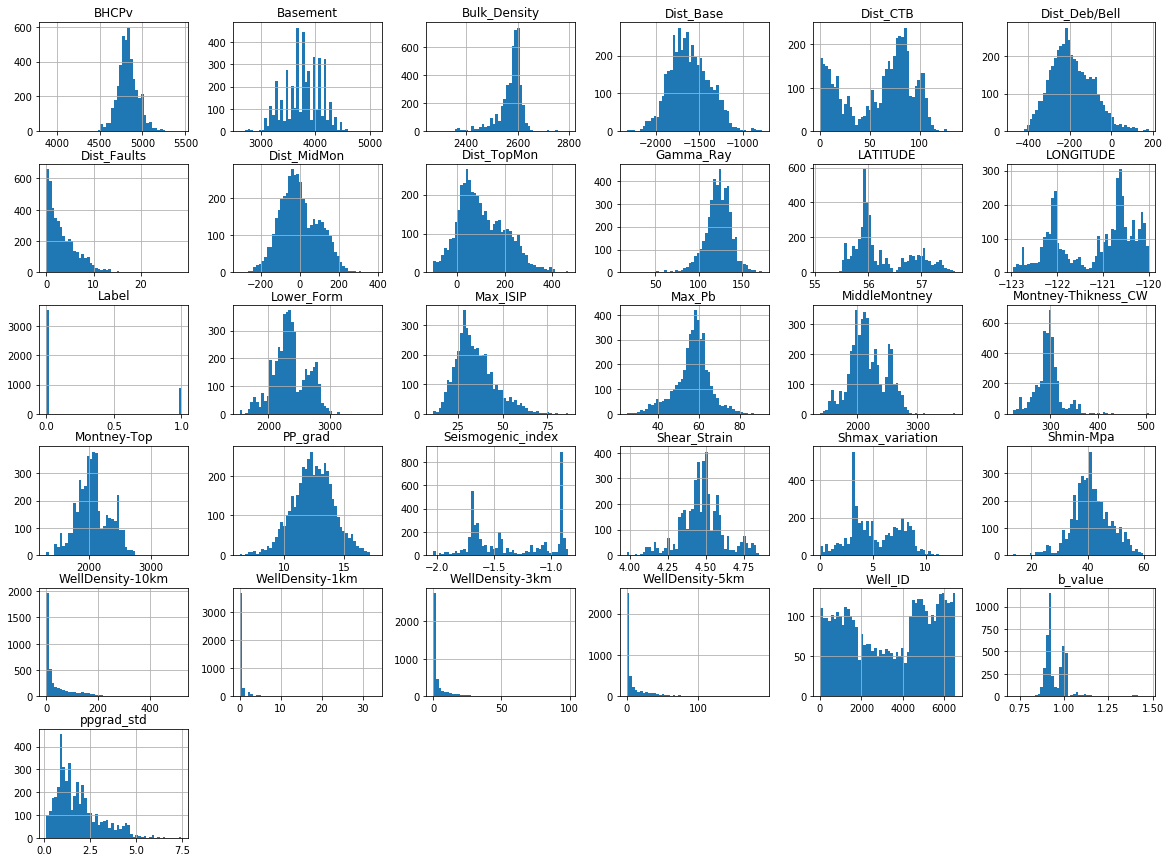

In [6]:
df_well.hist(bins=50, figsize=(20, 15));